In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Polystyrene, set 2

Set 2 data was taken on June 30th, 2022.

Concentration of the original solution:

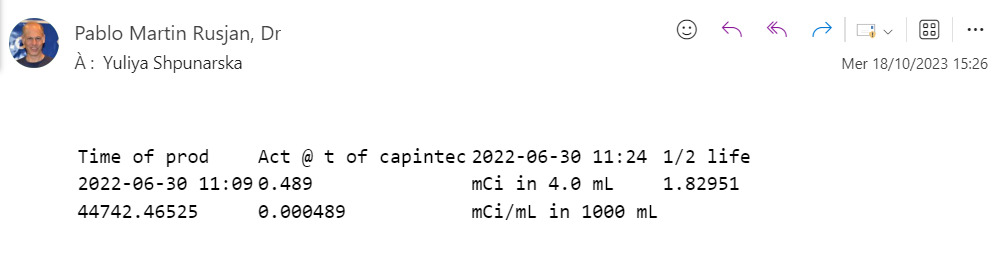

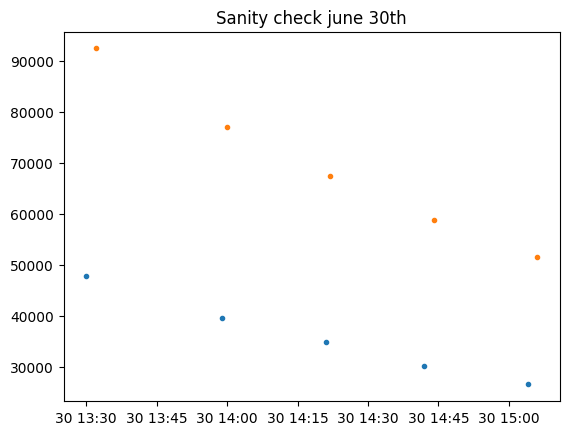

In [41]:
data = np.genfromtxt("efficiency_set2_polystyrene.csv", delimiter=",", skip_header=1, usecols=[3, 6, 8], encoding="utf8")
# shape: mass of sample, deadtime factor, CPM
time = np.genfromtxt("efficiency_set2_polystyrene.csv", delimiter=",", skip_header=1, usecols=[4], encoding="utf8", dtype='datetime64')

n = 2 # number of vials

# subtract the background
bg = np.genfromtxt("background_polystyrene.csv", delimiter=",", skip_header=1, usecols=[8], encoding="utf8")
data[:,2] = data[:,2] - bg

plt.figure()
plt.title("Sanity check june 30th")
plt.plot(time[::n], data[::n, 2], ".") # the column 2 is unnormalized CPM
plt.plot(time[1::n], data[1::n, 2], ".")
plt.show()

[135.38520448  17.86606641]
[[4461.82847582 -358.70551311]
 [-358.70551311   30.8404696 ]]


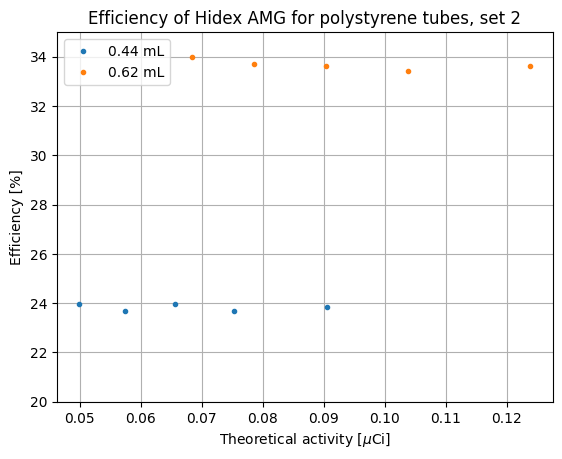

In [42]:
time_in_seconds = time.astype('datetime64[s]').astype('int')

# calculate the concentrations in the samples in CPM/ml (assuming 1g/ml)
conc = data[:,2]/data[:,0]

c = 0.000489 # mCi/ml, original concentration of the solution
c_time = np.datetime64('2022-06-30T11:09:30') # original time of measurement for the above concentration
c_time_in_seconds = c_time.astype('datetime64[s]').astype('int')

time_in_seconds = time_in_seconds - c_time_in_seconds # start the timer at the time of normalization

def decay(A0, t, h=109.7*60):
    # input t must be in seconds
    return A0*2**(-t/h)

# this is the theoretical concentration of radiation for each measurement in mCi/ml
ref = decay(c, time_in_seconds)

# calculate the efficiency
efficiency = conc/ref # in CPM/mCi
efficiency = efficiency * 1000 / (3.7e10 * 60) *100 # transform the cpm such that we get mCi/mCi

ref_activity = ref*data[:,0]*1000 # theoretical activity in tubes in uCi

plt.figure()
plt.title("Efficiency of Hidex AMG for polystyrene tubes, set 2")
plt.ylabel("Efficiency [%]")
plt.xlabel(r"Theoretical activity [$\mu$Ci]")
plt.plot(ref_activity[0::2], efficiency[0::2], "C0.", label="0.44 mL")
plt.plot(ref_activity[1::2], efficiency[1::2], "C1.", label="0.62 mL")
plt.ylim(20, 35)
plt.legend()
#plt.xscale('log')
plt.grid()

x = ref_activity
y = efficiency
b, cov = np.polyfit(x, y, 1, cov = True)
print(b)
print(cov)

# EDTA, set 2

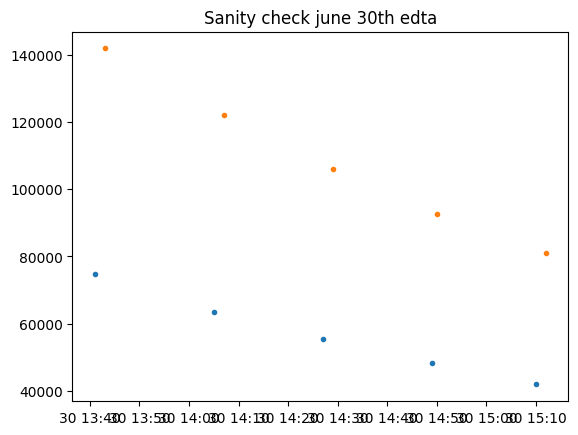

In [43]:
data = np.genfromtxt("efficiency_set2_EDTA.csv", delimiter=",", skip_header=1, usecols=[3, 6, 8], encoding="utf8")
# shape: mass of sample, deadtime factor, CPM
time = np.genfromtxt("efficiency_set2_EDTA.csv", delimiter=",", skip_header=1, usecols=[4], encoding="utf8", dtype='datetime64')

n = 8 # number of vials

# subtract the background
bg = np.genfromtxt("background_EDTA.csv", delimiter=",", skip_header=1, usecols=[8], encoding="utf8")
data[:,2] = data[:,2] - np.repeat(bg, 4)

plt.figure()
plt.title("Sanity check june 30th edta")
plt.plot(time[::n], data[::n, 2], ".") # the column 2 is unnormalized CPM
plt.plot(time[1::n], data[1::n, 2], ".")
plt.show()

[-8.86551952 36.51423252]
[[ 2.43927074 -0.74899381]
 [-0.74899381  0.29695224]]


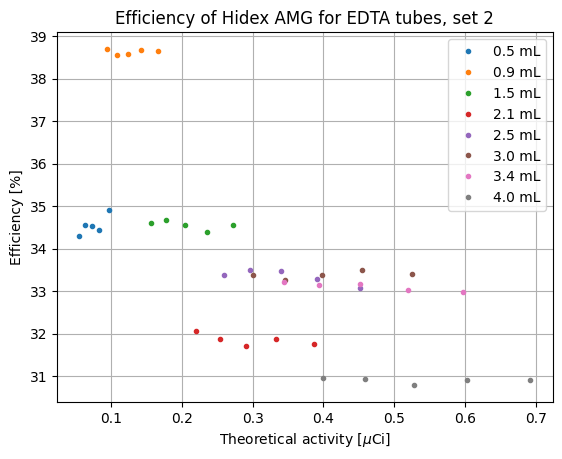

In [45]:
time_in_seconds = time.astype('datetime64[s]').astype('int')

# calculate the concentrations in the samples in CPM/ml (assuming 1g/ml)
conc = data[:,2]/data[:,0]

c = 0.000489 # mCi/ml, original concentration of the solution
c_time = np.datetime64('2022-06-30T11:09:30') # original time of measurement for the above concentration
c_time_in_seconds = c_time.astype('datetime64[s]').astype('int')

time_in_seconds = time_in_seconds - c_time_in_seconds # start the timer at the time of normalization

def decay(A0, t, h=109.7*60):
    # input t must be in seconds
    return A0*2**(-t/h)

# this is the theoretical concentration of radiation for each measurement in mCi/ml
ref = decay(c, time_in_seconds)

# calculate the efficiency
efficiency = conc/ref # in CPM/mCi
efficiency = efficiency * 1000 / (3.7e10 * 60) *100 # transform the cpm such that we get mCi/mCi

ref_activity = ref*data[:,0]*1000 # theoretical activity in tubes in uCi

plt.figure()
plt.title("Efficiency of Hidex AMG for EDTA tubes, set 2")
plt.ylabel("Efficiency [%]")
plt.xlabel(r"Theoretical activity [$\mu$Ci]")

plt.plot(ref_activity[0::n], efficiency[0::n], "C0.", label="0.5 mL")
plt.plot(ref_activity[1::n], efficiency[1::n], "C1.", label="0.9 mL")
plt.plot(ref_activity[2::n], efficiency[2::n], "C2.", label="1.5 mL")
plt.plot(ref_activity[3::n], efficiency[3::n], "C3.", label="2.1 mL")
plt.plot(ref_activity[4::n], efficiency[4::n], "C4.", label="2.5 mL")
plt.plot(ref_activity[5::n], efficiency[5::n], "C5.", label="3.0 mL")
plt.plot(ref_activity[6::n], efficiency[6::n], "C6.", label="3.4 mL")
plt.plot(ref_activity[7::n], efficiency[7::n], "C7.", label="4.0 mL")
#plt.ylim(20, 35)
plt.legend()
#plt.xscale('log')
plt.grid()

x = ref_activity
y = efficiency
b, cov = np.polyfit(x, y, 1, cov = True)
print(b)
print(cov)